# Homework 1

Welcome to your first homework!  This one is focused on just practicing some of the exercises covered in the last coding lesson.  There are also some more open-ended questions with elements that I didn't demonstrate in that lesson... they're structurally similar, but you might need to google a thing or two to figure out the correction function.  

You need to add your own code blocks to answer any of the coding questions.  Also, at the end of some sections I have a 'questions' section.  Add a text cell right below and enter your answers.

#Submission Instruction

1) First create a copy of this notebook in your drive and rename it to "DE_HW1_firstname_lastname". (e.g. my copy would be DE_HW1_sara_riazi)

2) When you are ready to submit (**after running all cells**). Downlowd the notebook file (File->Download->Download .ipynb), and submit it on Gradescope.

Note: Check your submission to make sure all cell outputs are present.


## Loading and Importing

First thing you need to do is load up your packages and then bring in the data.  

This dataset contains daily values for Amazon's stock.  This includes opening, closing, high price, low price, and also the amount of stock traded.

In [97]:
import pandas as pd
# also import matplotlib.pyplot and numpy with the proper aliases
import numpy as np
import matplotlib.pyplot as plt


In [98]:
# Bring in your data. You just need to run this cell.
price = pd.read_csv("https://docs.google.com/spreadsheets/d/1lCkFZhz-NGTuE1ZilzJA_ZYBZsbCSDpS2MllyGZWjX4/gviz/tq?tqx=out:csv")

## Exploring the whole dataset

Now make some code cells to explore the whole dataset.  I want you to do the following:

- Get the number of rows and columns
- Get the datatypes of each column
- Look at the first five rows
- Look at the last five rows
- Look at summary statistics

### Questions
Write down Pandas instruction to answer these queries.
- How many rows are in this dataset?
- Do any datatypes need to be converted?
- What was the mean and all time high opening stock price?

Q1: [2 points] How many rows are in this dataset?


In [99]:
#do not change the function name
def price_number_of_row():
  return 0 ##replace this line with return of the correct statement

As an example, I will provide the answer to this question:

In [100]:
def price_number_of_row_key():
  return price.shape[0];


In [101]:
print(price_number_of_row_key())

5852


Question 2: [2 points] Convert the datatype of 'Date' to an appropriate type

In [102]:
def convert_date_type():
  price['Date'] = pd.to_datetime(price['Date'])

I give you the grader statement for this one too:

In [103]:
convert_date_type();
print(price.Date.dtype);


datetime64[ns]


Question 3: [2 points] What is the mean of all opening stock price?

In [104]:
def mean_of_opening():
  stats = price.describe()
  mean_open = stats.loc['mean','Open']
  return mean_open

In [105]:
print(mean_of_opening())

377.4695570299043


Question 4: [4 points] What is the daily min volume for trades after 2010 (including 2010-1-1)

In [106]:
def min_daily_volume_after_2010():
  #hint first construct a new dataframe by limiting the price for dates greater than 2010
  price_after_2010 = price[price['Date'] >= '2010-01-01']
  stats_after_2010 = price_after_2010.describe()
  minimum_volume = stats_after_2010.loc['min','Volume']
  return minimum_volume #replace this with your answer

In [107]:
print(min_daily_volume_after_2010())

881300.0


Question 5: [4 points] Make a new column called up_binom. The value of up_binom is 1 if the closing price of the stock is higher (>=) than opening price, and 0 otherwise. Then find the number days the stock closed higher than openning.


In [108]:
def number_of_green_days():
  price['up_binom'] = np.where(price['Close'] >= price['Open'], 1, 0)
  return price['up_binom'].sum()

In [109]:
print(number_of_green_days());

2964


Question 5 [4 points] Plot the Closing price of the stock **after 2020**. The x-axis is day and the y-axis is the Closing price.
(See the Intro to Charts notebook)

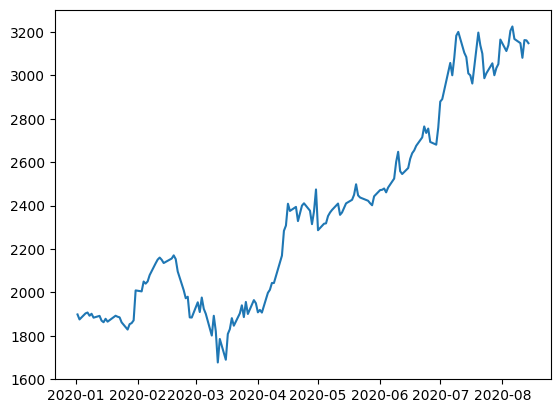

In [110]:
#plot
#filter the dataframe based on after 2020
price_after_2020 = price[price['Date'] >= '2020-01-01']
plt.plot(price_after_2020['Date'], price_after_2020['Close'])



Question 6: [4 points] If you had bought 1000$ worth Amazon stock (assume you could have fraction of stock too) on 1999-12-31 at opening, how much money would you have had if you sell all of your shared on 2019-12-31 at closing?



In [111]:
# I'm going to make your life easier and set the date column you created as the index.
# This will make searching and extracting the values much easier
price = price.set_index('Date')

In [112]:
def market_value(buy_date, sell_date):
  opening_price_on_buy_date = float(price.loc[buy_date, 'Open'])
  number_shares_amazon_stock_purchased = 1000/opening_price_on_buy_date
  closing_price_on_sell_date = float(price.loc[sell_date, 'Close'])
  money_had_after_sell = number_shares_amazon_stock_purchased * closing_price_on_sell_date
  return money_had_after_sell; #replace this with your answer


In [113]:
print(market_value('1999-12-31', '2019-12-31'))

23298.218641449963


## JSON

The last part of the assignment will have you working with some basic JSON data.  The URL links to a JSON file with stats on every episode of the TV show Silicon Valley


In [114]:
# First just run this to import the data
import requests
url = 'http://api.tvmaze.com/singlesearch/shows?q=Silicon Valley&embed=episodes'
sv_json_obj = requests.get(url)
sv_json = sv_json_obj.json()

### Viewing your JSON

Now just to look at what's in the JSON a bit

- Make a code cell that just calls the JSON we named above.
- Also run the .keys() function on the object.

In [115]:
print(sv_json)

print(sv_json.keys())

{'id': 143, 'url': 'https://www.tvmaze.com/shows/143/silicon-valley', 'name': 'Silicon Valley', 'type': 'Scripted', 'language': 'English', 'genres': ['Comedy'], 'status': 'Ended', 'runtime': 30, 'averageRuntime': 30, 'premiered': '2014-04-06', 'ended': '2019-12-08', 'officialSite': 'http://www.hbo.com/silicon-valley/', 'schedule': {'time': '22:00', 'days': ['Sunday']}, 'rating': {'average': 8.4}, 'weight': 99, 'network': {'id': 8, 'name': 'HBO', 'country': {'name': 'United States', 'code': 'US', 'timezone': 'America/New_York'}, 'officialSite': 'https://www.hbo.com/'}, 'webChannel': None, 'dvdCountry': None, 'externals': {'tvrage': 33759, 'thetvdb': 277165, 'imdb': 'tt2575988'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/215/538434.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/215/538434.jpg'}, 'summary': '<p>In the high-tech gold rush of modern Silicon Valley, the people most qualified to succeed are the least capable 

### Questions

Based on these responses, what keys are present in the JSON.  More importantly, are there any keys that don't get returned by .keys()?

**All keys at the top level get returned, but keys within objects do not get returned (ie name inside country)
The keys returned are: ['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'averageRuntime', 'premiered', 'ended', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'dvdCountry', 'externals', 'image', 'summary', 'updated', '_links', '_embedded']**

In [116]:
# First, you can see the structure after moving down a level into '_embedded'
sv_json['_embedded']

{'episodes': [{'id': 10897,
   'url': 'https://www.tvmaze.com/episodes/10897/silicon-valley-1x01-minimum-viable-product',
   'name': 'Minimum Viable Product',
   'season': 1,
   'number': 1,
   'type': 'regular',
   'airdate': '2014-04-06',
   'airtime': '22:00',
   'airstamp': '2014-04-07T02:00:00+00:00',
   'runtime': 30,
   'rating': {'average': 6},
   'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/565/1413845.jpg',
    'original': 'https://static.tvmaze.com/uploads/images/original_untouched/565/1413845.jpg'},
   'summary': "<p>Attending an elaborate launch party, Richard and his computer programmer friends - Big Head, Dinesh and Gilfoyle - dream of making it big. Instead, they're living in the communal Hacker Hostel owned by former programmer Erlich, who gets to claim ten percent of anything they invent there. When it becomes clear that Richard has developed a powerful compression algorithm for his website, Pied Piper, he finds himself courted by Gav

Question 7: [4 points] Find the day that show premiered.

In [117]:
def get_show_premiered():
  return sv_json['_embedded']['episodes'][0]['airdate']


In [118]:
print(get_show_premiered());

2014-04-06


Question 8: [4 points] Get the summary of a specific episode.

In [119]:
def get_summary(season, episode):
  episodes_list = sv_json['_embedded']['episodes']
  for episode_item in episodes_list:
    if episode_item['season'] != season:
      continue
    elif episode_item['number'] != episode:
      continue
    return episode_item['summary']

In [120]:
print(get_summary(2,5))

<p>Gavin creates interference that hinders Pied Piper's expansion. Meanwhile, the guys could be threatened by a nosy neighbor; Guilfoyle sets out to build servers; Richard's reluctant to let Jared move in; and Big Head's leadership skills are suspect.</p>
